##資料前處理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# For data preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# For classification model
# 'lr', 'rf', 'lightgbm', 'gbc', 'xgboost'
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

# For deep learning model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import AUC

# For evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc

In [2]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)
# Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
!gdown 1yXC_IuIDyb73qpUTw5LfxYP8ag7N2Kr-

zsh:1: command not found: gdown


In [4]:
!gdown 111qCWGjsz35fNvPPgRSQZQOuV6HGMeEi

zsh:1: command not found: gdown


In [5]:
data = pd.read_csv("final_cleaned.csv")
country_data = pd.read_csv("country_eu.csv")

In [6]:
country_data = country_data.rename(columns={'country': 'country_eu'})

In [7]:
data = pd.concat([country_data, data], axis=1)
data

,country_eu,mergeid,age,country,gender,edu_lv,marital,migration,citizen,religion,region,residence_type,network_size,integration,closeness,network_satisfaction,children,grandchildren,look_after_grand,home_own,mortgage,health_self,chronic,vision_d,vision_n,hearing,level_of_pain,glasses,hearing_aid,cane,walker,manual_wheelchair,eletric_wheelchair,buggy,utensils,personal_alarm,bar,raised_toilet,incontinence,heart,hypertension,cholesterol,stroke,diabetes,lung_disease,cancer,ulcer,parkinsons,cataracts,fracture,dementia,psycho,arthritis,kidney,depression,pessimism,suicidality,guilt,sleep,interest,irritability,appetite,fatigue,concentration,enjoyment,tearfulness,eurod_categ,limit_activity,limit_work,adls,iadls,mobility,uppermo,lowermo,lgmuscle,grossmo,finemo,fall,date_day,memory,imword_recall,deword_recall,serial_7,verbal,inactivity,drinking,smoking,dairy,legeggs,meat,fritsveg,outpatient,vaccination,eye_exam,mammogram,colon,dental,inpatient,other_facility,forgo_cost,forgo_available,health_literacy,medicine,polypharmacy,satisfied_insurance,supplementary_insurance,home_care,personal_care_hour,domestic_task_hour,meal_week,nursing_home,nursing_home_week,receive_help_freq,given_help_freq,activity_help,help_meet_need,income_work,income_self_work,hh_income,economic_status,income_house,long_term,bond_stock_funds,bank_account,value_house,value_business,value_car,oldage_pension,occupational_pension,disability_pension,unemployment_benefits,social_assistance,sickness_benefit,private_pensions,private_transfer,owe,given_gift_250,given_gift_5000,receive_gift_250,receive_gift_5000,rent_expenditure,hh_cosumption,unafford_food,make_ends_meet,hh_real_asset,hh_gross_asset,hh_net_asset,hh_net_worth,job,paidwork,other_job,employment,hours_work,number_social,voluntary,course,club,organization,read,games,card,social_freq,companionship,leftout,isolated,lonely,satisfied_life,casp_12,extraversion,aggreeableness,conscientiousness,neuroticism,openess,bmi,bmi_cate,overweight
0,11,AT-000787-01,58,5,0,2,1,0,1,0,0,1,7,4,4.00,10,0,0,non_applicable,1,0.0,2,0,2,1,2,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,5,5,5,27,0,2,2,1,3,5,1,3,1,0,non_applicable,1,1,0,0,0,0,5,0,0,1,1,0,0,0,0,0,0,0,1,non_applicable,non_applicable,60000.00000,25000.0,108000.00000,1,0.0,94341.5742,339774.1648,6000.0,1400000.0,406763.9454,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0.0,9600.0,0,1,1816763.976,440115.739,440115.739,2256879.715,2,non_applicable,1,2,60,2,0,1,0,0,1,0,0,2.500000,3,3,3,3,10,44,2.0,3.0,4.5,1.5,5.0,24.15,2,0
1,11,AT-001492-01,70,5,1,1,1,0,1,1,0,2,4,4,4.00,10,6,13,1,2,0.0,3,0,3,3,3,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,2,7,5,5,26,0,1,2,1,3,4,1,7,1,1,1,0,1,0,0,0,0,5,1,0,3,0,0,0,0,0,0,0,0,0,non_applicable,non_applicable,0.00000,0.0,27600.00000,1,0.0,28000.0000,0.0000,14000.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,10680.0,6600.0,0,0,0.000,42000.000,42000.000,42000.000,5,0,non_applicable,non_applicable,0,4,1,0,1,0,1,0,1,2.250000,3,3,3,3,8,39,5.0,3.5,3.5,4.5,3.5,21.05,2,0
2,11,AT-001492-02,71,5,0,1,1,0,1,1,0,2,4,4,3.25,9,6,13,1,non_applicable,0.0,1,1,3,2,3,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,4,3,6,6,5,22,0,1,3,1,3,2,2,5,1,1,non_applicable,0,0,0,0,0,0,5,1,1,2,0,0,0,0,0,0,0,0,0,0,non_applicable,0.00000,0.0,27600.00000,1,0.0,28000.0000,0.0000,14000.0,0.0,0.0000,0.0,32200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,10680.0,6600.0,non_applicable,0,0.000,42000.000,42000.000,42000.000,1,0,non_applicable,non_applicable,0,4,1,0,1,0,1,0,1,2.750000,3,3,3,3,8,46,3.5,5.0,5.0,1.0,3.0,22.69,2,0
3,11,AT-001719-01,60,5,0,1,1,1,0,1,0,1,4,4,3.75,9,6,9,1,2,0.0,5,1,2,2,2,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4,3,4,3,5,12,0,1,3,1,2,5,1,12,0,0,non_applicable,0,1,0,0,0,0,3,1,1,2,0,0,0,0,0,0,0,0,0,non_applicable,non_appl

In [8]:
# Drop the target variables of other papers
#used_data1 = data.copy()
#used_data2 = data.copy()
used_data = data.copy()
used_data = used_data.drop(['mergeid','country','citizen','network_size','integration','closeness','network_satisfaction','grandchildren','look_after_grand','vision_d','glasses','walker','buggy','utensils','personal_alarm','bar','raised_toilet','incontinence','depression','pessimism','suicidality','guilt','sleep','interest','irritability','appetite','fatigue','concentration','enjoyment','tearfulness','adls','mobility','uppermo','lowermo','lgmuscle','grossmo','finemo','fall','date_day','memory','imword_recall','deword_recall','serial_7','verbal',
                  'dairy','legeggs','meat','hours_work','personal_care_hour','domestic_task_hour','meal_week','nursing_home_week','receive_help_freq','given_help_freq','activity_help','help_meet_need','long_term','bond_stock_funds','bank_account','value_house','value_business','value_car','oldage_pension','occupational_pension','disability_pension','unemployment_benefits','social_assistance','sickness_benefit','private_pensions','private_transfer','given_gift_250','given_gift_5000','receive_gift_250','receive_gift_5000','rent_expenditure','hh_cosumption','unafford_food',
                  'hh_real_asset','hh_gross_asset','hh_net_asset','hh_net_worth','employment','course','club','organization','read','games','card','companionship','leftout','isolated','lonely','extraversion','aggreeableness','conscientiousness','neuroticism','openess','forgo_cost','forgo_available','bmi','bmi_cate','overweight'], axis=1)
#used_data2 = used_data2.drop(['mergeid','country','citizen','network_size','integration','closeness','network_satisfaction','grandchildren','look_after_grand','vision_d','glasses','walker','buggy','utensils','personal_alarm','bar','raised_toilet','incontinence','depression','pessimism','suicidality','guilt','sleep','interest','irritability','appetite','fatigue','concentration','enjoyment','tearfulness','adls','mobility','uppermo','lowermo','lgmuscle','grossmo','finemo','fall','date_day','memory','imword_recall','deword_recall','serial_7','verbal',
#                  'dairy','legeggs','meat','hours_work','personal_care_hour','domestic_task_hour','meal_week','nursing_home_week','receive_help_freq','given_help_freq','activity_help','help_meet_need','long_term','bond_stock_funds','bank_account','value_house','value_business','value_car','oldage_pension','occupational_pension','disability_pension','unemployment_benefits','social_assistance','sickness_benefit','private_pensions','private_transfer','given_gift_250','given_gift_5000','receive_gift_250','receive_gift_5000','rent_expenditure','hh_cosumption','unafford_food',
#                  'hh_real_asset','hh_gross_asset','hh_net_asset','hh_net_worth','employment','course','club','organization','read','games','card','companionship','leftout','isolated','lonely','extraversion','aggreeableness','conscientiousness','neuroticism','openess','forgo_cost','forgo_available','bmi','bmi_cate','overweight'], axis=1)

In [12]:
# derived_income
used_data['income'] = used_data['income_work']+ used_data['income_self_work'] + used_data['income_house']
# 刪除原本的變數
used_data.drop(columns=['income_work', 'income_self_work', 'income_house'], inplace=True)

In [ ]:
#derived_wheelchair

manual_wheelchair = used_data['manual_wheelchair']
eletric_wheelchair = used_data['eletric_wheelchair']
conditions = [
    (manual_wheelchair == 1) | (eletric_wheelchair == 1),
    (manual_wheelchair == 0) & (eletric_wheelchair == 0)
]
choices = [1, 0]

#wheelchair: 若至少有一個條件符合設為1，完全不符合設為0
used_data['wheelchair'] = np.select(conditions, choices, default=np.nan)
# 刪除原本的變數
used_data.drop(columns=['manual_wheelchair', 'eletric_wheelchair'], inplace=True)

In [14]:
# Drop the target variables of other papers
target_vars = ['vaccination', 'eye_exam', 'mammogram', 'colon', 'dental']
######################################
target_var = 'vaccination'
######################################
other_target_vars = [var for var in target_vars if var != target_var]
used_data = used_data.drop(other_target_vars, axis=1)
used_data.shape

(51720, 67)

### 判斷類別變數

In [15]:
binary_categorical_candidates = [col for col in used_data.columns
                                 if set(used_data[col].dropna().unique()) == {1, 2}  # 必須同時包含 1 和 2
                                 and used_data[col].dtype in ['int64', 'object']]  # 限制在整數或文字類型

In [16]:
binary_categorical_candidates

[]

In [17]:
for col in binary_categorical_candidates:
    used_data[col] = used_data[col].replace({1: 0, 2: 1})

In [18]:
# 找出唯一值數量超過 2，但小於 30 的整數或物件型變數
categorical_candidates = [col for col in used_data.columns
                          if used_data[col].dtype in ['int64', 'object']  # 限制在整數或文字類型
                          and used_data[col].nunique() > 2  # 至少有 3 種不同的值
                          and used_data[col].nunique() < 30]  # 避免高維類別變數 (可以調整)
print("可能是類別變數的欄位:", categorical_candidates)

可能是類別變數的欄位: ['country_eu', 'edu_lv', 'marital', 'residence_type', 'children', 'home_own', 'health_self', 'vision_n', 'hearing', 'level_of_pain', 'hearing_aid', 'limit_work', 'drinking', 'smoking', 'fritsveg', 'inpatient', 'health_literacy', 'satisfied_insurance', 'nursing_home', 'job', 'paidwork', 'other_job', 'number_social', 'satisfied_life']


In [19]:
# 針對類別變數作one-hot encoding
used_data = pd.get_dummies(used_data, columns=categorical_candidates, dtype=int)

In [20]:
used_data

,age,gender,migration,religion,region,mortgage,chronic,cane,heart,hypertension,cholesterol,stroke,diabetes,lung_disease,cancer,ulcer,parkinsons,cataracts,fracture,dementia,psycho,arthritis,kidney,eurod_categ,limit_activity,iadls,inactivity,outpatient,vaccination,other_facility,medicine,polypharmacy,supplementary_insurance,home_care,hh_income,economic_status,owe,make_ends_meet,voluntary,social_freq,casp_12,income,wheelchair,country_eu_11,country_eu_12,country_eu_14,country_eu_15,country_eu_16,country_eu_17,country_eu_18,country_eu_19,country_eu_20,country_eu_23,country_eu_25,country_eu_28,country_eu_31,country_eu_32,country_eu_35,country_eu_47,country_eu_48,country_eu_51,country_eu_53,country_eu_55,country_eu_57,country_eu_59,edu_lv_0,edu_lv_1,edu_lv_2,marital_1,marital_2,marital_3,marital_4,residence_type_1,residence_type_2,residence_type_3,residence_type_4,children_0,children_1,children_2,children_3,children_4,children_5,children_6,children_7,children_8,children_9,children_10,children_11,children_12,children_13,children_14,children_17,home_own_1,home_own_2,home_own_3,home_own_4,home_own_non_applicable,health_self_1,health_self_2,health_self_3,health_self_4,health_self_5,vision_n_1,vision_n_2,vision_n_3,vision_n_4,vision_n_5,hearing_1,hearing_2,hearing_3,hearing_4,hearing_5,level_of_pain_0,level_of_pain_1,level_of_pain_2,level_of_pain_3,hearing_aid_1,hearing_aid_2,hearing_aid_3,limit_work_0,limit_work_1,limit_work_non_applicable,drinking_1,drinking_2,drinking_3,smoking_1,smoking_2,smoking_3,fritsveg_1,fritsveg_2,fritsveg_3,fritsveg_4,fritsveg_5,inpatient_0,inpatient_1,inpatient_2,inpatient_3,inpatient_4,inpatient_5,inpatient_6,inpatient_7,inpatient_8,inpatient_9,inpatient_10,health_literacy_1,health_literacy_2,health_literacy_3,health_literacy_4,health_literacy_5,satisfied_insurance_1,satisfied_insurance_2,satisfied_insurance_3,satisfied_insurance_4,nursing_home_0,nursing_home_1,nursing_home_2,job_1,job_2,job_3,job_4,job_5,job_6,paidwork_0,paidwork_1,paidwork_non_applicable,other_job_0,other_job_1,other_job_non_applicable,number_social_0,number_social_1,number_social_2,number_social_3,number_social_4,number_social_5,number_social_6,number_social_7,satisfied_life_0,satisfied_life_1,satisfied_life_2,satisfied_life_3,satisfied_life_4,satisfied_life_5,satisfied_life_6,satisfied_life_7,satisfied_life_8,satisfied_life_9,satisfied_life_10
0,58,0,0,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,1,0,108000.00000,1,0.0,1,0,2.500000,44,85000.00000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,70,1,0,1,0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7,1,0,1,0,0,0,27600.00000,1,0.0,0,1,2.250000,39,0.00000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,71,0,0,1,0,0.0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,1,0,1,1,0,0,27600.00000,1,0.0,0,1,2.750000,46,0.00000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,60,0,1,1,0,0.0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,12,0,0,1,1,0,0,22957.80642,1,3000.0,0,0,3.000000,39,11181.92532,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0

### 設定資料集格式

In [21]:
X = used_data.drop(target_var, axis=1)
y = used_data[target_var]
X = X.astype('float32')
y = y.astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((41376, 186), (10344, 186), (41376,), (10344,))

### 訓練模型

In [22]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam

In [23]:
def create_dnn_model(dim):
    model = Sequential()
    model.add(Dense(256, input_dim=dim, activation=relu))  # 增加 Neurons
    model.add(BatchNormalization())  # 加入 Batch Normalization
    model.add(Dropout(0.3))  # Dropout 降低 Overfitting

    model.add(Dense(128, activation=relu))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(64, activation=relu))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(32, activation=relu))
    model.add(Dropout(0.1))

    model.add(Dense(1, activation='sigmoid'))  # 使用 `sigmoid` 進行二元分類

    # 降低 Learning Rate，使用 Adam 優化器
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[AUC(name='auroc')])
    return model

In [24]:
def create_fcn_model(dim):
    model = Sequential()
    model.add(Dense(256, input_dim=dim, activation=relu))  # 增加 Neurons
    model.add(BatchNormalization())  # 加入 Batch Normalization

    model.add(Dense(128, activation=relu))
    model.add(BatchNormalization())

    model.add(Dense(64, activation=relu))
    model.add(BatchNormalization())

    model.add(Dense(32, activation=relu))

    model.add(Dense(1, activation='sigmoid'))  # 使用 `sigmoid` 進行二元分類

    # 降低 Learning Rate，使用 Adam 優化器
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[AUC(name='auroc')])
    return model

In [25]:
# 定義所有模型
models = {
     'DNN': lambda X: create_dnn_model(dim=X.shape[1]),
    'FCN': lambda X: create_fcn_model(dim=X.shape[1]),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, force_row_wise=True, verbose=-1)
}

In [26]:
#Group Splitting
groups = {
    'Croatia': X['country_eu_47'] == 1,
    'Belgium': X['country_eu_23'] == 1,
    'Estonia': X['country_eu_35'] == 1,
    'Germany': X['country_eu_12'] == 1,
    'Italy': X['country_eu_16'] == 1,
    'Austria': X['country_eu_11'] == 1,
    'Czech Republic': X['country_eu_28'] == 1,
    'Greece': X['country_eu_19'] == 1,
    'France': X['country_eu_17'] == 1,
    'Denmark': X['country_eu_18'] == 1,
    'Spain': X['country_eu_15'] == 1,
    'Switzerland': X['country_eu_20'] == 1,
    'Hungary': X['country_eu_32'] == 1,
    'Finland': X['country_eu_55'] == 1,
    'Latvia': X['country_eu_57'] == 1,
    'Lithuania': X['country_eu_48'] == 1,
    'Low income': X['economic_status'] == 0,
    'High income': X['economic_status'] == 1,
    'Low education': X['edu_lv_0'] == 1,
    'Medium education': X['edu_lv_1'] == 1,
    'High education': X['edu_lv_2'] == 1,
}

In [27]:
def cross_validation_models(X, y, groups, models, cv=5):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    all_results = []

    for model_name, model_func in models.items():
        print(f"開始交叉驗證: {model_name}...")

        results_table = []

        for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y), start=1):
            print(f"{model_name} - Fold {fold_idx} 訓練中...")

            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


            # 初始化模型
            if model_name in ['DNN', 'FCN']:
                model = model_func(X_train)
                model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=0, validation_split=0.1)
            else:
                model = model_func
                model.fit(X_train, y_train)

            print(f"{model_name} - Fold {fold_idx} 訓練完成")

            # 計算不同群體的分類表現
            for group_name, group_filter in groups.items():
                X_group = X_test[group_filter]
                y_group = y_test[group_filter]

                # 確保群體樣本數大於 0
                if X_group.shape[0] == 0:
                    continue

                # 預測
                y_proba = model.predict(X_group).ravel() if model_name in ['DNN', 'FCN'] else model.predict_proba(X_group)[:, 1]
                y_pred = (y_proba > 0.5).astype(int)

                from sklearn.metrics import confusion_matrix

                # Compute the confusion matrix
                cm = confusion_matrix(y_group, y_pred)

                # Handle cases where the confusion matrix has fewer than two rows
                if cm.shape[0] < 2:  # Single-class scenario
                    print(f"Warning: Single-class detected in group '{group_name}'. Confusion matrix:\n{cm}")
                    tpr = 0  # True Positive Rate
                    fpr = 0  # False Positive Rate
                else:
                # Compute TPR and FPR if both classes are present
                    tpr = cm[1, 1] / cm[1].sum() if cm[1].sum() > 0 else 0
                    fpr = cm[0, 1] / cm[0].sum() if cm[0].sum() > 0 else 0

                # Append results
                results_table.append({
                    "group": group_name,
                    "accuracy": accuracy_score(y_group, y_pred),
                    "precision": precision_score(y_group, y_pred, zero_division=0),
                    "recall": recall_score(y_group, y_pred, zero_division=0),
                    "f1": f1_score(y_group, y_pred, zero_division=0),
                    "roc_auc": roc_auc_score(y_group, y_proba) if len(set(y_group)) > 1 else None,
                    "demographic_parity": y_pred.mean(),
                    "equalized_odds_tpr": tpr,
                    "equalized_odds_fpr": fpr,
                    "model": model_name
                })

        # 計算 CV 平均結果
        results_df = pd.DataFrame(results_table)
        numeric_columns = [col for col in results_df.columns if col not in ["group", "model"]]
        results_avg = results_df.groupby("group")[numeric_columns].mean().reset_index()

        # 確保 group 順序與 groups 定義一致
        results_avg["group"] = pd.Categorical(results_avg["group"], categories=groups.keys(), ordered=True)
        results_avg = results_avg.sort_values("group").reset_index(drop=True)

        # 加回 model 欄位
        results_avg["model"] = model_name

        all_results.append(results_avg)

    # 合併所有模型結果
    final_results = pd.concat(all_results, ignore_index=True)
    return final_results

In [28]:
results_df = cross_validation_models(X, y, groups, models)
results_df

開始交叉驗證: DNN...
DNN - Fold 1 訓練中...
DNN - Fold 1 訓練完成
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
DNN - Fold 2 訓練中...
DNN - Fold 2 訓練完成
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
28/28 ━━━━━━━

,group,accuracy,precision,recall,f1,roc_auc,demographic_parity,equalized_odds_tpr,equalized_odds_fpr,model
0,Croatia,0.674974,0.600155,0.621123,0.602521,0.729996,0.421473,0.621123,0.287923,DNN
1,Belgium,0.630215,0.614997,0.682055,0.642916,0.689584,0.553607,0.682055,0.426371,DNN
2,Estonia,0.650753,0.681951,0.727032,0.700650,0.693557,0.607228,0.727032,0.450949,DNN
3,Germany,0.628316,0.701260,0.568924,0.623576,0.687370,0.446081,0.568924,0.297837,DNN
4,Italy,0.679685,0.689627,0.427236,0.524469,0.706871,0.259692,0.427236,0.137636,DNN
...,...,...,...,...,...,...,...,...,...,...
142,Low income,0.729658,0.676765,0.438782,0.532312,0.764741,0.227409,0.438782,0.113219,LightGBM
143,High income,0.702246,0.695048,0.679632,0.687240,0.768515,0.470693,0.679632,0.276757,LightGBM
144,Low education,0.716766,0.703253,0.674240,0.688386,0.785134,0.444963,0.674240,0.246338,LightGBM
145,Medium education,0.728448,0.665349,0.455327,0.540599,0.764407,0.240211,0.455327,0.123911,LightGBM


In [29]:
pd.set_option('display.max_rows', None)  # 顯示所有行
pd.set_option('display.max_columns', None)  # 顯示所有欄位
results_df

,group,accuracy,precision,recall,f1,roc_auc,demographic_parity,equalized_odds_tpr,equalized_odds_fpr,model
0,Croatia,0.674974,0.600155,0.621123,0.602521,0.729996,0.421473,0.621123,0.287923,DNN
1,Belgium,0.630215,0.614997,0.682055,0.642916,0.689584,0.553607,0.682055,0.426371,DNN
2,Estonia,0.650753,0.681951,0.727032,0.700650,0.693557,0.607228,0.727032,0.450949,DNN
3,Germany,0.628316,0.701260,0.568924,0.623576,0.687370,0.446081,0.568924,0.297837,DNN
4,Italy,0.679685,0.689627,0.427236,0.524469,0.706871,0.259692,0.427236,0.137636,DNN
5,Austria,0.582533,0.325997,0.636550,0.428565,0.630993,0.484992,0.636550,0.435919,DNN
6,Czech Republic,0.599806,0.495301,0.603246,0.537637,0.645357,0.481987,0.603246,0.404218,DNN
7,Greece,0.689048,0.712294,0.554286,0.618802,0.746228,0.360097,0.554286,0.194936,DNN
8,France,0.658760,0.533880,0.338051,0.405684,0.678320,0.224856,0.338051,0.162607,DNN
9,Denmark,0.644504,0.530538,0.405656,0.451657,0.663473,0.284145,0.405656,0.212911,DNN


### ROC曲線 (overall model for all dataset)

In [30]:
# Train models
final_models = {}

# Train Logistic Regression
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)
final_models['Logistic Regression'] = model_lr

# Train Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
final_models['Random Forest'] = model_rf

# Train XGBoost
model_xgb = XGBClassifier(eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)
final_models['XGBoost'] = model_xgb

# Train Gradient Boosting
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)
final_models['Gradient Boosting'] = model_gb

# Train LightGBM
model_lgbm = LGBMClassifier(random_state=42, force_row_wise=True, verbose=-1)
model_lgbm.fit(X_train, y_train)
final_models['LightGBM'] = model_lgbm

# Train DNN
model_dnn = create_dnn_model(dim=X_train.shape[1])
model_dnn.fit(X_train, y_train, epochs=30, batch_size=64, verbose=0, validation_split=0.1)
final_models['DNN'] = model_dnn

# Train FCN
model_fcn = create_fcn_model(dim=X_train.shape[1])
model_fcn.fit(X_train, y_train, epochs=30, batch_size=64, verbose=0, validation_split=0.1)
final_models['FCN'] = model_fcn

324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


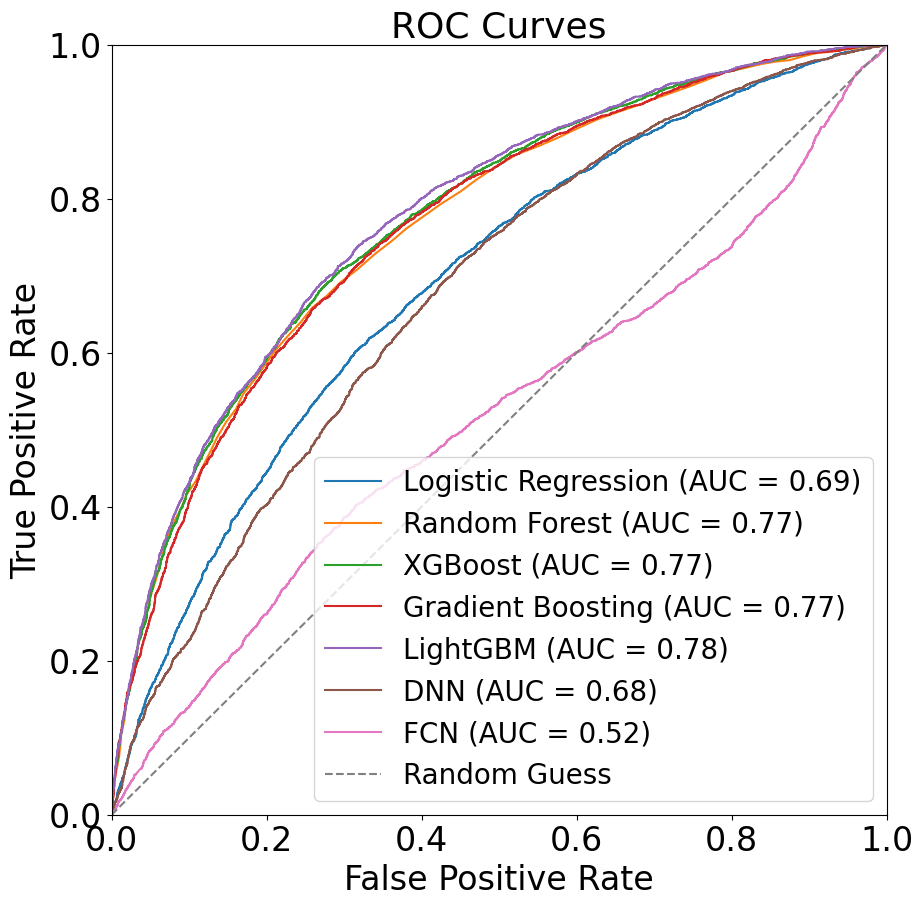

In [31]:
# Plot ROC Curves
plt.figure(figsize=(10, 10))

# Plot ROC Curves for all models
for model_name, model in final_models.items():
    if model_name in ['DNN', 'FCN']:
        y_proba = model.predict(X_test).ravel()
    else:
        y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")

# Plot the random guess ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Format plot
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=24)
plt.ylabel('True Positive Rate', fontsize=24)
plt.title('ROC Curves', fontsize=26)
plt.legend(fontsize=20)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Show the plot
plt.show()

### overall model分國家的ROC曲線

In [32]:
# 定義國家名稱與欄位對應
country_groups = {
    'Croatia': 'country_eu_47',
    'Belgium': 'country_eu_23',
    'Estonia': 'country_eu_35',
    'Germany': 'country_eu_12',
    'Italy': 'country_eu_16',
    'Australia': 'country_eu_11',
    'Czech Republic': 'country_eu_28',
    'Greece': 'country_eu_19',
    'France': 'country_eu_17',
    'Denmark': 'country_eu_18',
    'Spain': 'country_eu_15',
    'Switzerland': 'country_eu_20',
    'Hungary': 'country_eu_32',
    'Finland': 'country_eu_55',
    'Latvia': 'country_eu_57',
    'Lithuania': 'country_eu_48',
}

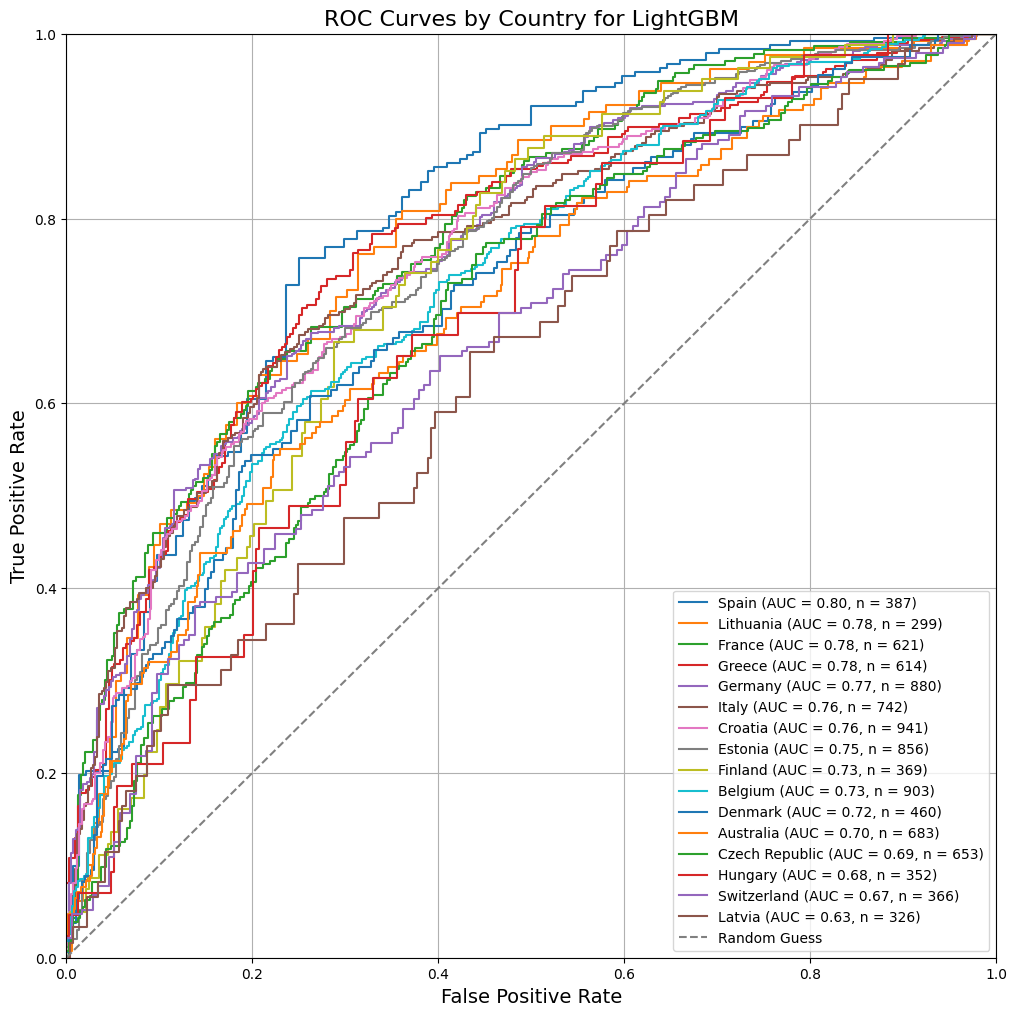

In [33]:
plt.figure(figsize=(12, 12))

# 儲存每個國家的 AUC 以便排序
country_results = []

# 訓練模型
model_lgbm = LGBMClassifier(random_state=42, force_row_wise=True, verbose=-1)

model_lgbm.fit(X_train, y_train)

# 計算每個國家的 ROC 曲線和 AUC
for country, column_name in country_groups.items():
    if column_name not in X_test.columns:  # 確保該欄位存在於測試集
        print(f"Warning: Column {column_name} not found in X_test. Skipping {country}.")
        continue

    # 篩選該國家的測試集數據
    group_filter = X_test[column_name] == 1
    X_group = X_test[group_filter]
    y_group = y_test[group_filter]

    if len(X_group) > 0:  # 確保每群都有樣本
        n_samples = len(X_group)
        y_proba = model_lgbm.predict_proba(X_group)[:, 1]
        fpr, tpr, _ = roc_curve(y_group, y_proba)
        roc_auc = roc_auc_score(y_group, y_proba)

        # 保存結果
        country_results.append((country, fpr, tpr, roc_auc, n_samples))

# 根據 AUC 由大到小排序
country_results = sorted(country_results, key=lambda x: x[3], reverse=True)

# 繪製排序後的 ROC 曲線
for country, fpr, tpr, roc_auc, n_samples in country_results:
    plt.plot(fpr, tpr, label=f"{country} (AUC = {roc_auc:.2f}, n = {n_samples})")

# 隨機猜測的參考線
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves by Country for LightGBM', fontsize=16)
plt.legend(fontsize=10, loc='lower right')
plt.grid(True)

plt.show()

### 加入交叉驗證

In [34]:
# 定義國家名稱與欄位對應
country_groups = {
    'Croatia': 'country_eu_47',
    'Belgium': 'country_eu_23',
    'Estonia': 'country_eu_35',
    'Germany': 'country_eu_12',
    'Italy': 'country_eu_16',
    'Australia': 'country_eu_11',
    'Czech Republic': 'country_eu_28',
    'Greece': 'country_eu_19',
    'France': 'country_eu_17',
    'Denmark': 'country_eu_18',
    'Spain': 'country_eu_15',
    'Switzerland': 'country_eu_20',
    'Hungary': 'country_eu_32',
    'Finland': 'country_eu_55',
    'Latvia': 'country_eu_57',
    'Lithuania': 'country_eu_48',
}

Processing country: Croatia
Processing country: Belgium
Processing country: Estonia
Processing country: Germany
Processing country: Italy
Processing country: Australia
Processing country: Czech Republic
Processing country: Greece
Processing country: France
Processing country: Denmark
Processing country: Spain
Processing country: Switzerland
Processing country: Hungary
Processing country: Finland
Processing country: Latvia
Processing country: Lithuania


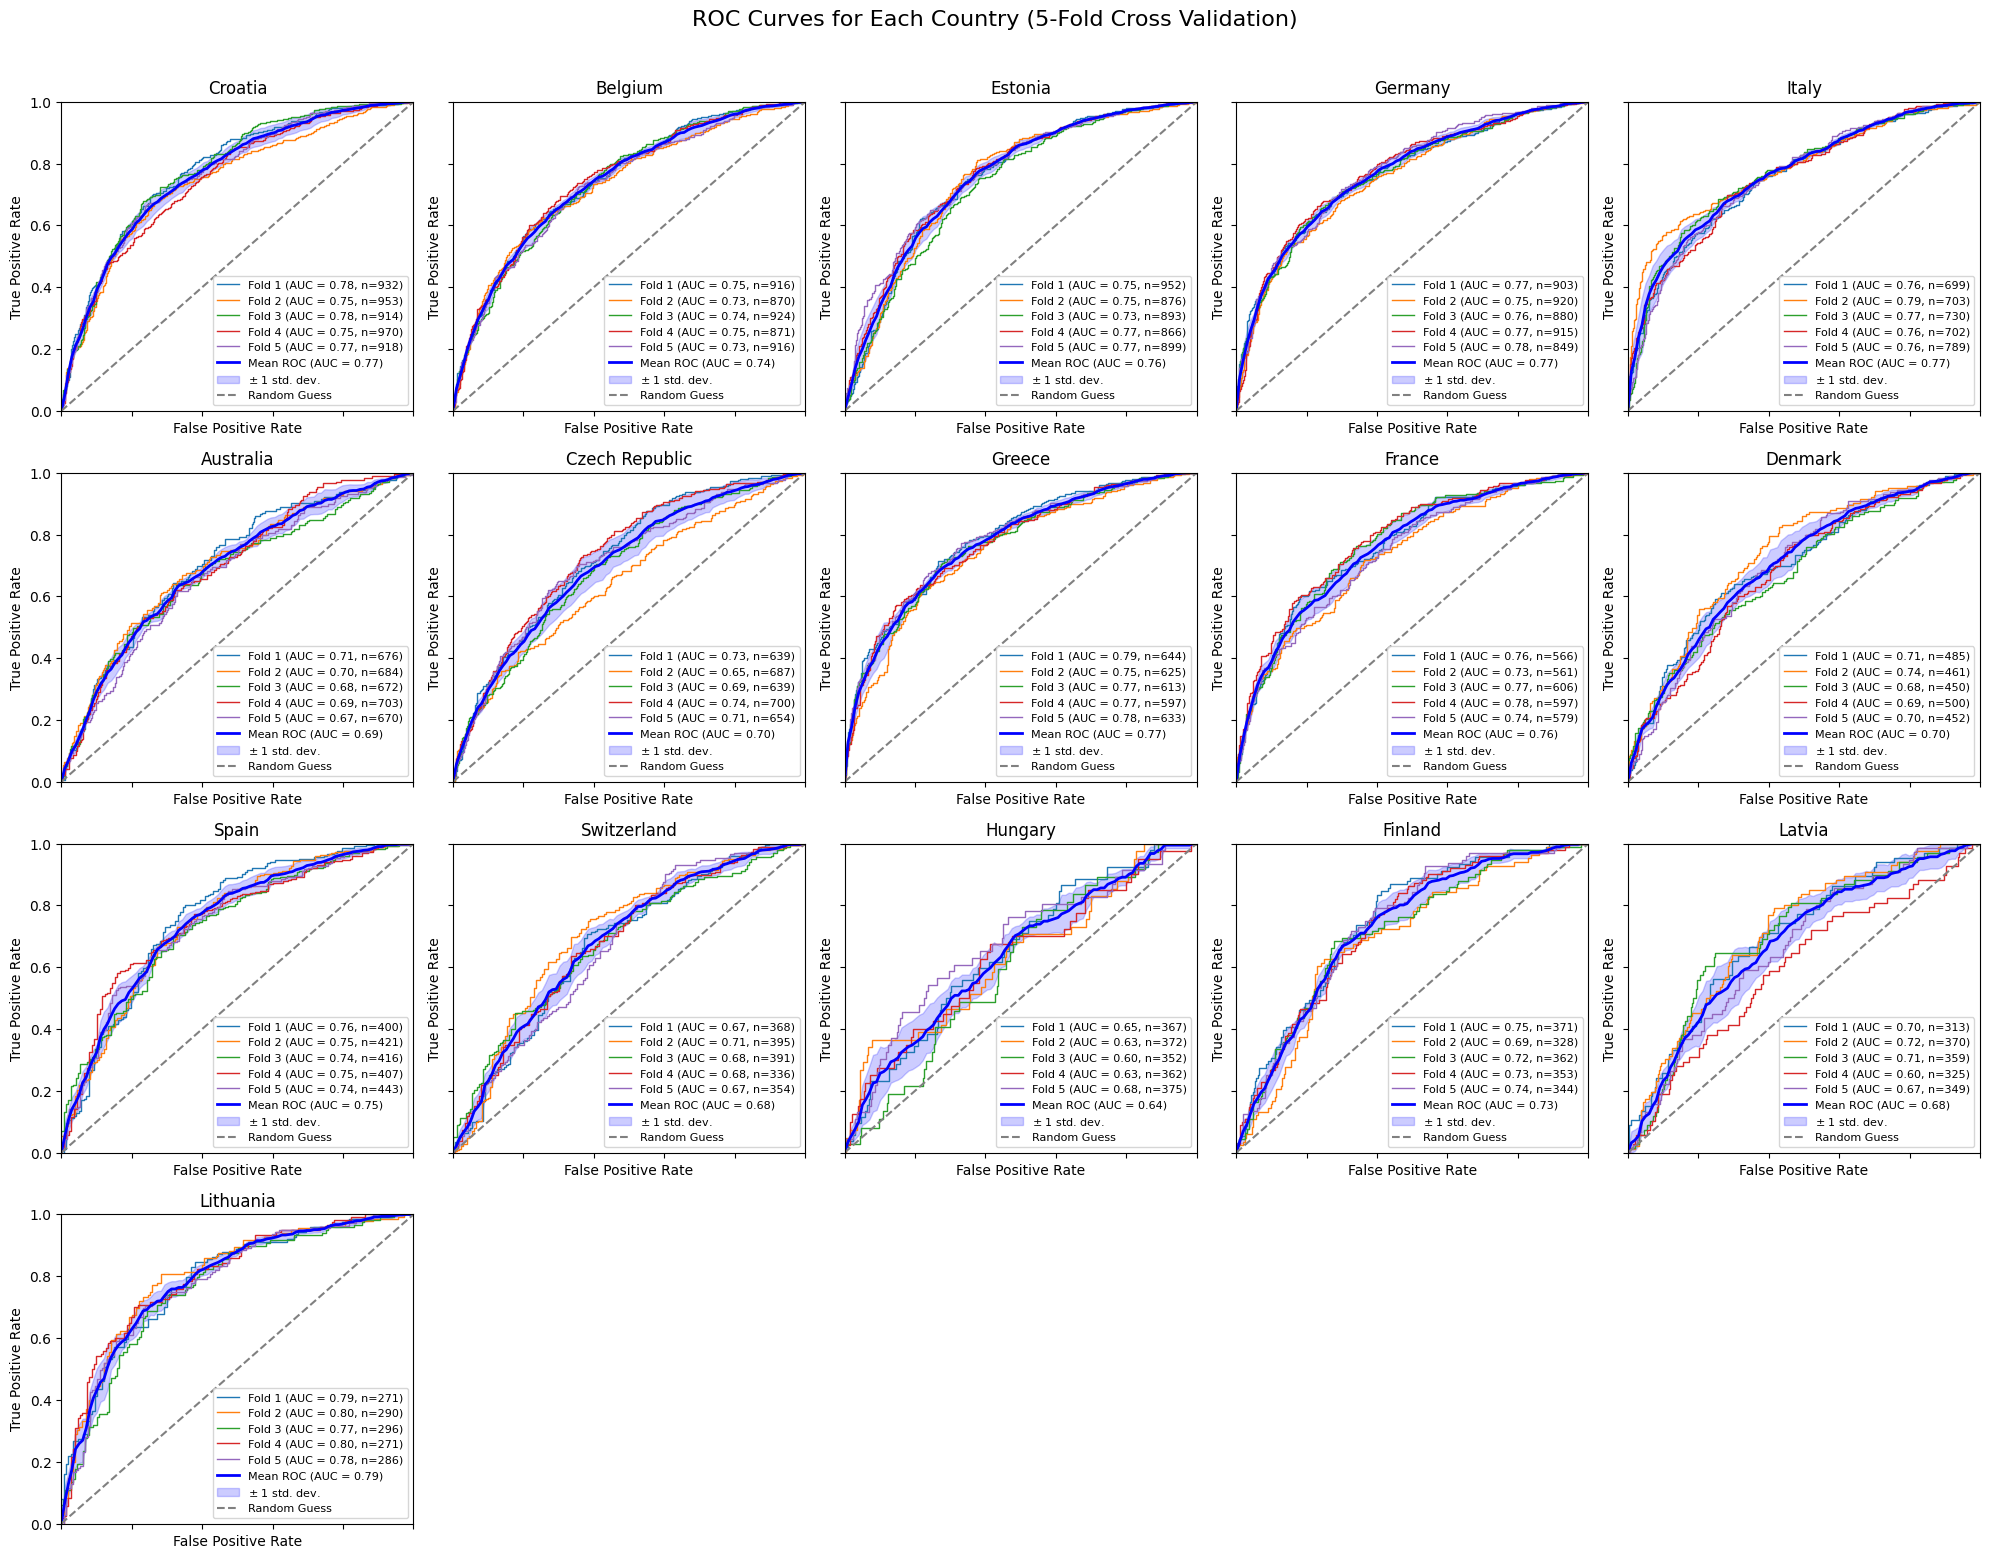

In [35]:
from sklearn.model_selection import StratifiedKFold
from scipy.interpolate import interp1d
from sklearn.metrics import auc

# 定義 5 折交叉驗證
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 設置圖形大小和排列 (5 列 5 行)
n_countries = len(country_groups)
n_rows = 5
n_cols = 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20), sharex=True, sharey=True)
axes = axes.flatten()

# 處理每個國家
mean_fpr = np.linspace(0, 1, 100)  # 統一的 FPR 範圍
for idx, (country, column_name) in enumerate(country_groups.items()):
    if idx >= n_rows * n_cols:  # 防止超出格子數
        break

    ax = axes[idx]
    print(f"Processing country: {country}")

    # 初始化數據
    tprs = []
    aucs = []
    fold_samples = []  # 用於保存每個 fold 的樣本數

    # 5折交叉驗證
    for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        # 分割數據 (每次跑國家迴圈切出來都會一樣)
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # 訓練模型
        model_lgbm = LGBMClassifier(random_state=42, force_row_wise=True, verbose=-1)
        model_lgbm.fit(X_train, y_train)

        # 篩選國家測試集
        if column_name not in X_test.columns:
            continue
        country_filter = X_test[column_name] == 1
        X_country = X_test[country_filter]
        y_country = y_test[country_filter]

        if len(y_country) == 0:  # 無樣本，跳過
            continue

        # 預測國家測試集概率
        y_proba_country = model_lgbm.predict_proba(X_country)[:, 1]

        # 計算 ROC 曲線和 AUC
        fpr, tpr, _ = roc_curve(y_country, y_proba_country)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        # 插值到統一的 FPR 範圍
        interp_tpr = interp1d(fpr, tpr, kind='linear', fill_value='extrapolate')(mean_fpr)
        interp_tpr[0] = 0.0  # 保證起點為 0
        tprs.append(interp_tpr)

        # 保存當前 fold 的樣本數
        fold_samples.append(len(y_country))

        # 繪製當前折的 ROC 曲線並標註 AUC
        ax.plot(fpr, tpr, lw=1, label=f"Fold {fold_idx + 1} (AUC = {roc_auc:.2f}, n={len(y_country)})")

    # 計算平均 TPR 和標準差
    mean_tpr = np.mean(tprs, axis=0) if tprs else np.zeros_like(mean_fpr)
    std_tpr = np.std(tprs, axis=0) if tprs else np.zeros_like(mean_fpr)
    mean_tpr[-1] = 1.0  # 保證終點為 1
    # 計算平均 AUC 和標準差
    mean_auc = np.mean(aucs) if aucs else 0
    std_auc = np.std(aucs) if aucs else 0

    # 繪製平均 ROC 曲線和 ±1 標準差
    ax.plot(mean_fpr, mean_tpr, color='b', lw=2, label=f"Mean ROC (AUC = {mean_auc:.2f})")
    ax.fill_between(mean_fpr,
                    np.maximum(mean_tpr - std_tpr, 0),
                    np.minimum(mean_tpr + std_tpr, 1),
                    color='blue', alpha=0.2, label=r"$\pm$ 1 std. dev.")

    # 繪製國家結果
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
    ax.set_title(f"{country}", fontsize=12)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(fontsize=8, loc='lower right')

# 移除多餘的 subplot
for i in range(len(country_groups), len(axes)):
    fig.delaxes(axes[i])

fig.suptitle("ROC Curves for Each Country (5-Fold Cross Validation)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

### 資料不平衡問題

In [37]:
# 保存結果
category_distribution = {}

# 處理每個國家
for country, column_name in country_groups.items():
    if column_name in used_data.columns:  # 確保欄位存在
        # 計算每個類別的分布
        value_counts = used_data[used_data[column_name] == 1]["vaccination"].value_counts()
        category_distribution[country] = value_counts.to_dict()  # 保存為字典格式

# 轉成DataFrame
distribution_df = pd.DataFrame(category_distribution).fillna(0).astype(int)
distribution_df

,Croatia,Belgium,Estonia,Germany,Italy,Australia,Czech Republic,Greece,France,Denmark,Spain,Switzerland,Hungary,Finland,Latvia,Lithuania
0,2807,2266,1945,2026,2097,2570,2021,1680,1869,1476,759,857,1612,1295,1352,777
1,1880,2231,2541,2441,1526,835,1298,1432,1040,872,1328,987,216,463,364,637


Heat Map

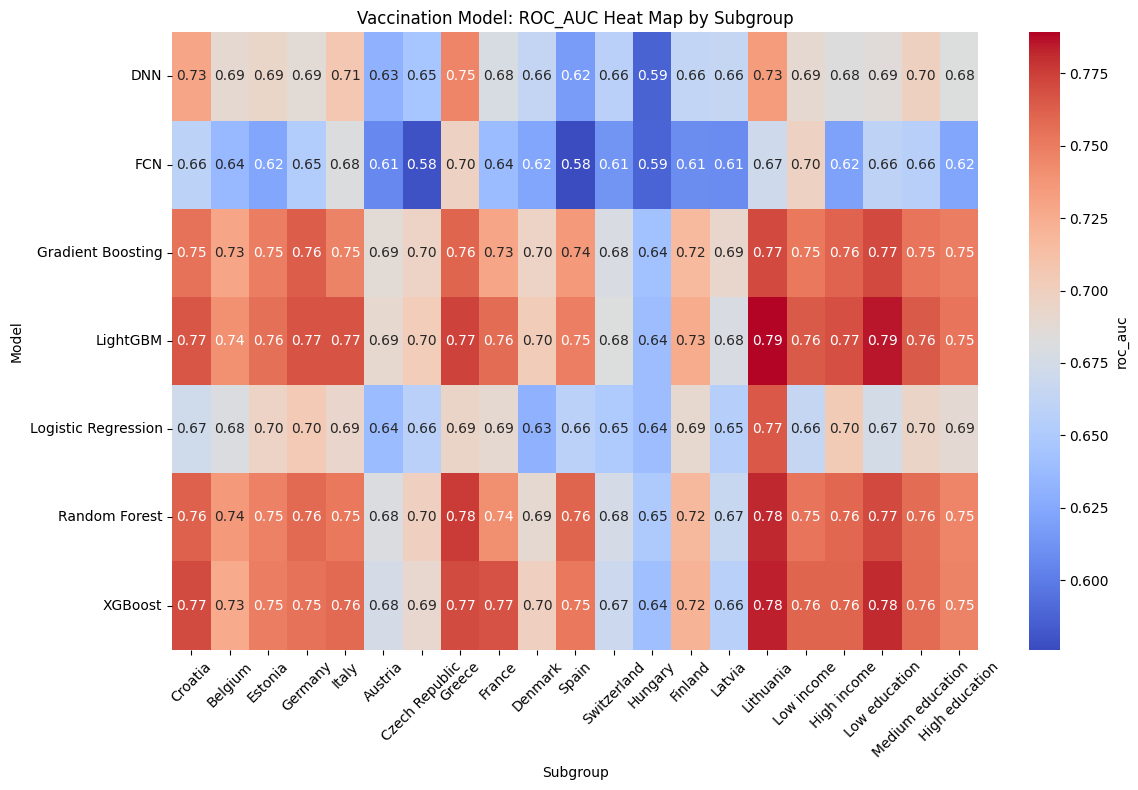

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假設 `results_df` 是 cross_validation_models 的輸出結果
# 其中包含欄位 ['group', 'accuracy', 'model']
def plot_heatmap(results_df, value_col='roc_auc', title='Model Accuracy Heat Map'):
    # 創建透視表
    heatmap_data = results_df.pivot_table(index='model', columns='group', values=value_col, aggfunc='mean')

    # 繪製 Heat Map
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': value_col})
    plt.title(title)
    plt.ylabel('Model')
    plt.xlabel('Subgroup')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 繪製 Heat Map
plot_heatmap(results_df, value_col='roc_auc', title='Vaccination Model: ROC_AUC Heat Map by Subgroup')

SHAP

In [41]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.6/547.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 6.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 8.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


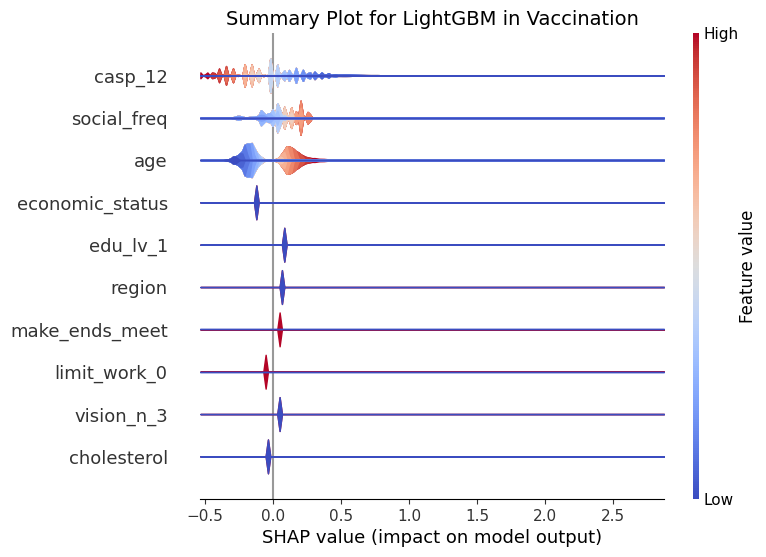

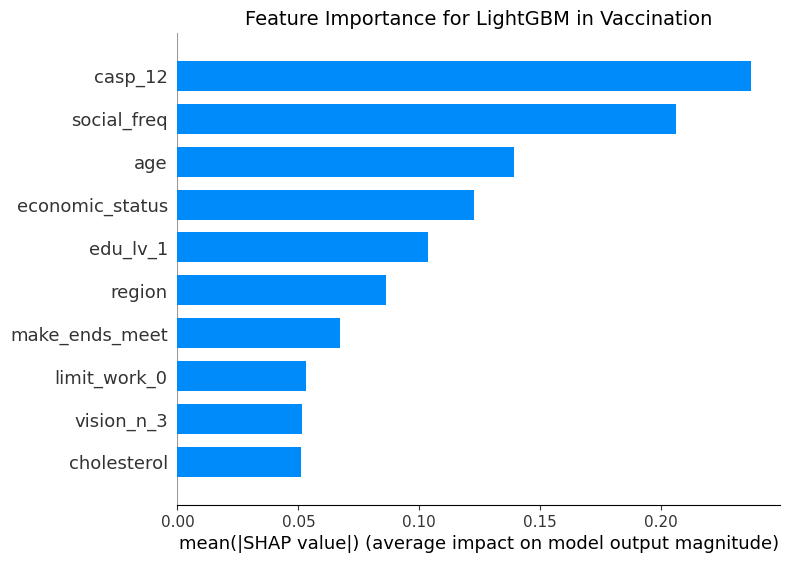

In [61]:
import shap
import matplotlib.pyplot as plt
import numpy as np

def plot_shap_summary(model, model_name, X_train, X_test, target_var):
    # logistic regression
    if model_name == 'LightGBM':
        explainer = shap.LinearExplainer(model, X_train)
        shap_values = explainer.shap_values(X_test)
    # tree-based, DNN, etc.
    else:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
    
    # 1. layered violin
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X_test, max_display=10,
                      plot_type="layered_violin", show=False)
    plt.title(f'Summary Plot for {model_name} in {target_var}', fontsize=14)
    plt.show()

    # 2. bar plot
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X_test, max_display=10,
                      plot_type='bar', show=False)
    plt.title(f'Feature Importance for {model_name} in {target_var}', fontsize=14)
    plt.show()

plot_shap_summary(model_lr, 
                  'LightGBM', 
                  X_train, 
                  X_test, 
                  'Vaccination')